In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# 1. Оценка результатов AB теста

In [2]:
df1 = pd.read_csv(r'D:\Datasets\student_data\dataset_part1_students.csv', sep='\t')

In [3]:
df1.head()

,y,W,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10
0,-1.459404,0.0,0.986277,0.873392,0.509746,0.271836,0.336919,0.216954,0.276477,0.343316,0.862159,0.156700
1,-1.694174,0.0,0.140887,0.757080,0.736325,0.355663,0.341093,0.666803,0.217101,0.561427,0.124179,0.319736
2,5.378374,0.0,0.953214,0.137357,0.569413,0.975665,0.503367,0.667664,0.034191,0.456119,0.155851,0.476049
3,2.188189,1.0,0.169702,0.896258,0.373394,0.379693,0.858317,0.646061,0.583462,0.668350,0.177793,0.849248
4,2.862696,1.0,0.442373,0.831468,0.763921,0.919691,0.070573,0.156165,0.636894,0.555696,0.191929,0.425656


Посмотрим как распределены значения признака X_i, где i=1,10 в зависимости от класса W

In [4]:
def plot(ax, i):
    ax.hist(df1[df1['W'] == 1]['X_'+str(i)], label='W=1');
    ax.hist(df1[df1['W'] == 0]['X_'+str(i)], color='red', alpha=0.3, label='W=0')
    ax.set_title('Distribution of X_' +str(i)+ 'depending on class W')
    ax.set_xlabel('X_'+str(i))
    ax.set_ylabel('frequancy')
    ax.legend()

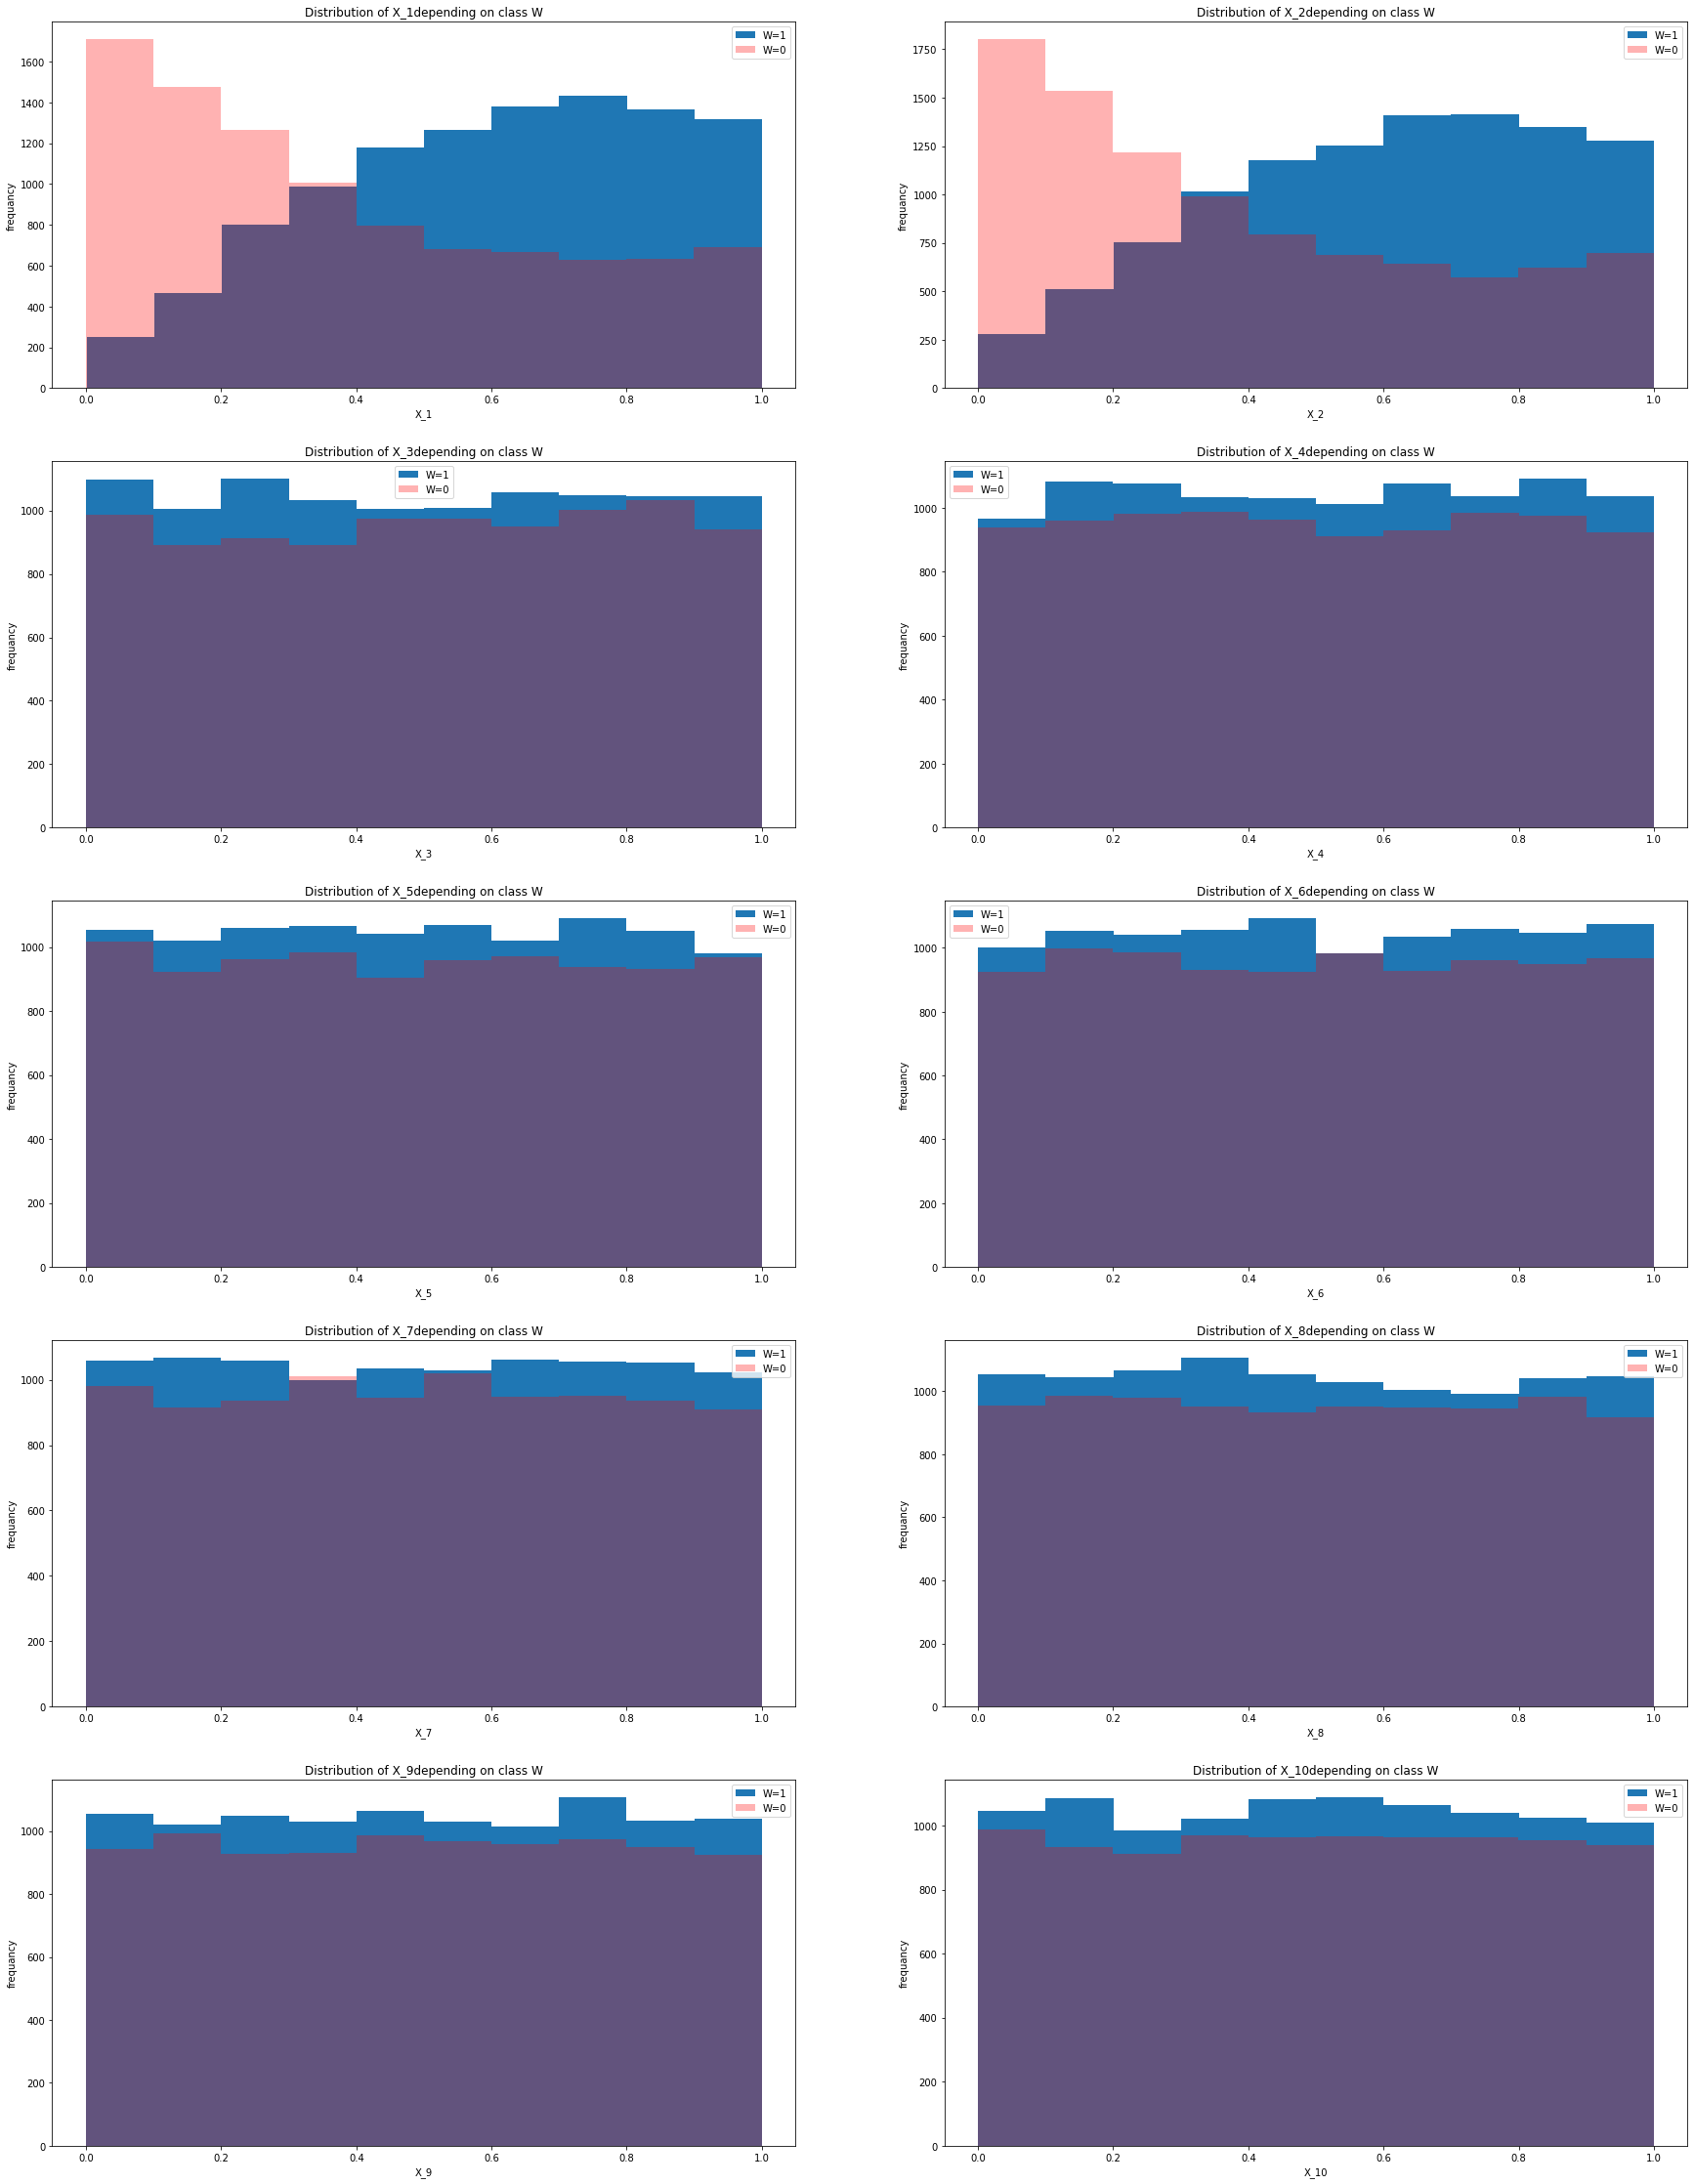

In [5]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(30, 40))

list_ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
nums = [i for i in range(1, 11)]

for tup in zip(list_ax, nums):
    plot(tup[0], tup[1])
    
plt.show()

Видим, что данные распределены неравномерно при X_1 и X_2: в классе W=0 больше значений, которые ближе к 0, а в W=1 наборот - ближе к 1. В остальных случаях данные более-менее распределены равномерно между классами

Проверим важность признаков

In [6]:
X = df1[['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10']].copy()
y = df1['W'].copy()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f'X_{i}' for i in range(1, 11)]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [9]:
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)

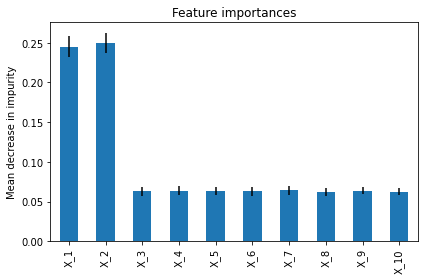

In [10]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Видим, что половину вклада вносят первые 2 признака, остальную половину вносят признаки X_3, X_4, ... , X_10

**В итоге** делаю вывод, что есть зависимость treatment от объектов, так как имеется неравномерное распределение данных в Х_1 и Х_2, а также, вносимый вклад признаков Х_1 и Х_2 на двоих равен 50%. 

1.Проверьте подходящую для данных гипотезу о равенстве средних в выборках

Выдвинем гипотезу, что средние y в W=1 и W=0 равны.

$$H_0: m_1 = m_0$$

$$H_1: m_1 \neq m_0$$

Исследуем распределения на нормальность. Воспользуемся **критерием Шапиро-Уилка**. Выберем уровень значимости **$\alpha$ = 0.05**.

In [11]:
stats.shapiro(df1[df1['W'] == 0]['y'])

(0.9998553991317749, 0.837329626083374)

In [12]:
stats.shapiro(df1[df1['W'] == 1]['y'])

(0.9998707175254822, 0.8599085807800293)

Видим, что p_value в обоих случаях больше чем уровень значимости => нет повода отклонять гипотезу о нормальном распределении выборок


 m=1.87 and sigma=3.03



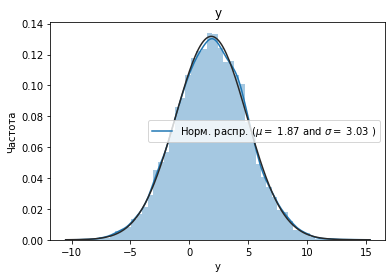

In [13]:
sns.distplot(df1[df1['W'] == 0]['y'], fit=stats.norm);

(mu, sigma) = stats.norm.fit(df1[df1['W'] == 0]['y'])
print( '\n m={:.2f} and sigma={:.2f}\n'.format(mu, sigma))

plt.legend(['Норм. распр. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Частота')
plt.title('y');


 m=2.27 and sigma=3.03



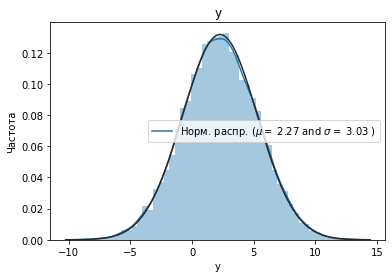

In [14]:
sns.distplot(df1[df1['W'] == 1]['y'], fit=stats.norm);

(mu, sigma) = stats.norm.fit(df1[df1['W'] == 1]['y'])
print( '\n m={:.2f} and sigma={:.2f}\n'.format(mu, sigma))

plt.legend(['Норм. распр. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Частота')
plt.title('y');

Чтобы проверить равенство мат. ожиданий при неизвестных дисперсиях нужно проверить гипотезу о равенстве дисперсий

Выдвинем гипотезу, что дисперсии y в W=1 и W=0 равны.

$$H_0: \sigma_1 = \sigma_0$$

$$H_1: \sigma_1 \neq \sigma_0$$

Исследуем распределения на равенство дисперсий. Воспользуемся **Критерием Бартлетта**. Выберем уровень значимости **$\alpha$ = 0.05**.

In [15]:
stats.bartlett(df1[df1['W'] == 1]['y'], df1[df1['W'] == 0]['y'])

BartlettResult(statistic=0.0024815596612026594, pvalue=0.9602696098003418)

Видим, что p_value больше чем уровень значимости => нет повода отклонять гипотезу о равенстве дисперсий выборок

In [16]:
stats.ttest_ind(df1[df1['W'] == 1]['y'], df1[df1['W'] == 0]['y'], equal_var=True)

Ttest_indResult(statistic=9.332400850259313, pvalue=1.1400916649505329e-20)

Видим, что p_value меньше чем уровень значимости => отклоняем гипотезу о равенстве мат. ожиданий выборок

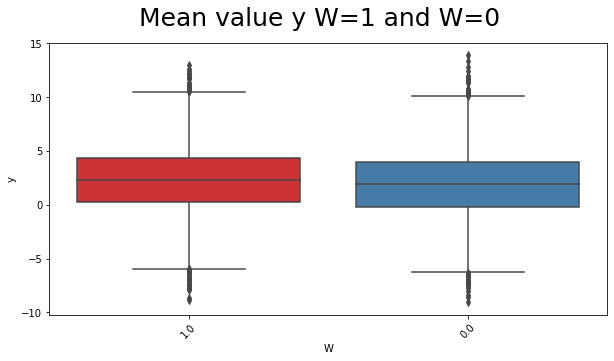

In [17]:
#создаем пространство для графика
fig = plt.figure(figsize=(10,5))
 
table = df1.groupby(['W'], as_index=False)['y'].mean().sort_values(by='y', ascending=False)

#построение графиков
ax = sns.boxplot(data=df1, x="W", y="y", order=table['W'].to_list(), palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle("Mean value y W=1 and W=0",fontsize=25);

2. Каков treatment effect нашего воздействия? (ATE)

ATE рассчитывается в следующем пункте.

3. Примените известные вам методы оценки ATE с учетом особенностей данных.

In [19]:
#!pip install causalinference

Используем регрессию для оценки эффекта

$$ Y = \alpha + \beta Z + \gamma X$$ 

In [20]:
from causalinference import CausalModel

cm = CausalModel(
    Y=df1['y'].values, 
    D=df1['W'].values, 
    X=X.values)

cm.est_via_ols(adj=1)

print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.513      0.049     10.458      0.000      0.417      0.610



В силу того, что повлиять на рандомизированный эксперимент мы не можем, но мы заинтересованы в оценке ATE и видим, что по признакам X_1 и X_2 имеем различия в treatment и control группах, то можем использовать Property Score

Используем методику **Weighting**

In [21]:
cm.est_propensity_s()
cm.est_via_weighting()
print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.513      0.049     10.458      0.000      0.417      0.610

Treatment Effect Estimates: Weighting

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.827      0.712     -1.161      0.246     -2.223      0.569



Используем еще один метод: **Stratification and Blocking**

Этот метод состоит из группировки точек данных в группы схожей предрасположенности и оценки ATE внутри этих групп. Затем с помощью est_via_blocking() объединим все ATE в одну.

In [22]:
cm.stratify_s()

cm.est_via_blocking()
print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.513      0.049     10.458      0.000      0.417      0.610

Treatment Effect Estimates: Weighting

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.827      0.712     -1.161      0.246     -2.223      0.569

Treatment Effect Estimates: Blocking

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.515      0.056      9.264      0.000      0.406      0.624
           ATC      0.412      0.066      6.215      0.000      0.282      0.542
           ATT      0.609      0.066      9.195      0.000      0.479      0.

Сравнение разных методик

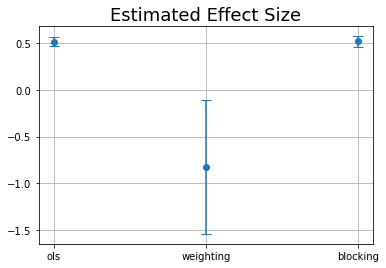

In [23]:
y = []
yerr = []
x_label = []

for method, result in dict(cm.estimates).items():
    y.append(result["ate"])
    yerr.append(result["ate_se"])
    x_label.append(method)
    
x = np.arange(len(y))

plt.errorbar(x=x, y=y, yerr=yerr, linestyle="none", capsize=5, marker="o")
plt.xticks(x, x_label)
plt.title("Estimated Effect Size", fontsize=18)
plt.grid();

4. Выводы

Видим, что метод, использующий регрессию и Stratification and Blocking выдали почти одинаковый результат, примерно 0.5. Метод, использующий Weighting выдал результат с противоположным знаком -0.827. С одной стороны странно, что получилось отрицательное значение, так как гипотеза о равенстве средних была отвергнута на уровне значимости 0.05 и в группе treatment средние больше, чем в control, поэтому напрашивается вывод, что знак должен быть как минимум положительным. С другой стороны, было замечено, что группы control и treatment разнородны по 1 и 2 признакам, например, в группе control могли быть пожилые люди, а в treatment - молодые, поэтому целесообразно использовать методику Weighting для получения оценки ATE. Таким образом, различие в средних могло быть достигнуто нерандомизированным разбиением на control и treatment 

# 2. Оценка результатов AB теста с показателями до начала эксперимента

In [24]:
df2 = pd.read_csv(r'D:\Datasets\student_data\dataset_part2_students.csv', sep='\t')
df2.head()

,y_1,y_0,W,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10
0,5.887156,2.785060,1.0,0.605978,0.733369,0.138947,0.312673,0.997243,0.128162,0.178993,0.752925,0.662161,0.784310
1,2.232601,5.533515,0.0,0.096894,0.058571,0.962396,0.616557,0.086630,0.561272,0.616525,0.963843,0.574304,0.371161
2,0.144419,0.095546,1.0,0.452145,0.201850,0.569305,0.195096,0.583704,0.476313,0.517814,0.823099,0.732225,0.069056
3,-2.446425,3.590472,1.0,0.672129,0.643485,0.828014,0.204469,0.617489,0.617701,0.301069,0.871741,0.589654,0.981770
4,2.163090,1.365405,0.0,0.442232,0.126318,0.508831,0.431786,0.915940,0.709016,0.890655,0.588886,0.636830,0.342209


Посмотрим как распределены значения признака X_i, где i=1,10 в зависимости от класса W

In [25]:
def plot(ax, i):
    ax.hist(df2[df2['W'] == 1]['X_'+str(i)], label='W=1');
    ax.hist(df2[df2['W'] == 0]['X_'+str(i)], color='red', alpha=0.3, label='W=0')
    ax.set_title('Distribution of X_' +str(i)+ 'depending on class W')
    ax.set_xlabel('X_'+str(i))
    ax.set_ylabel('frequancy')
    ax.legend()

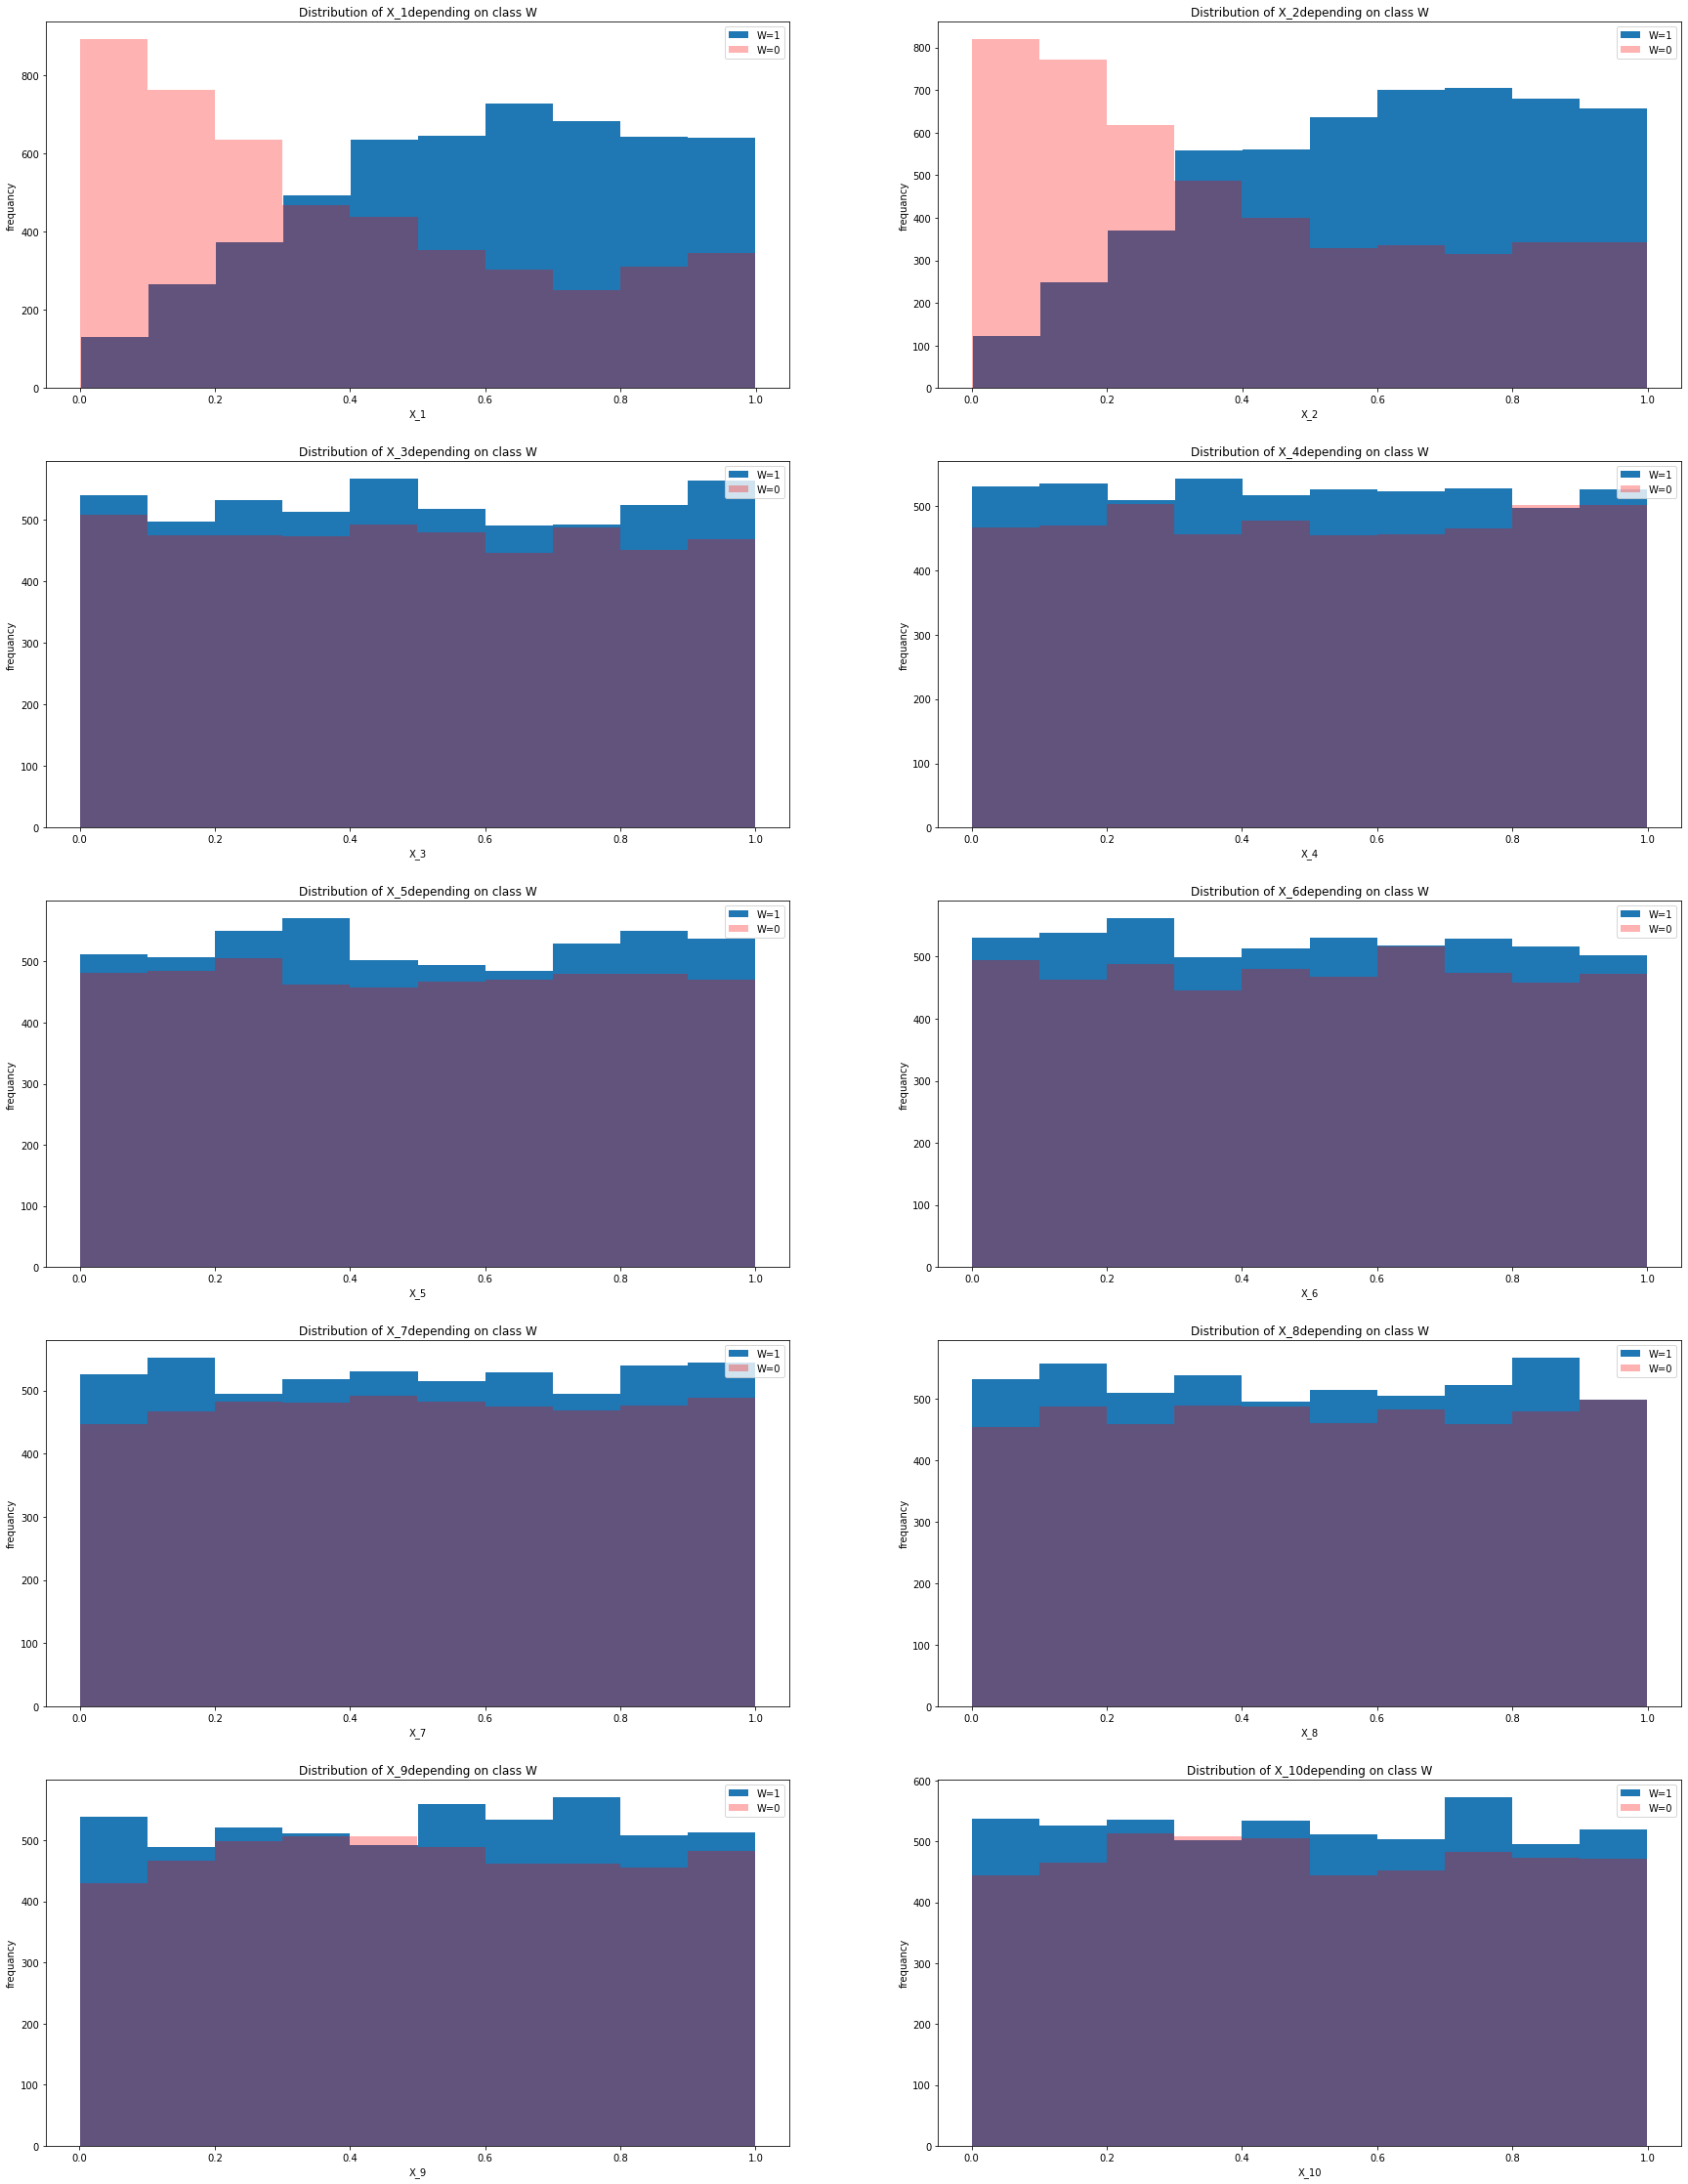

In [26]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(30, 40))

list_ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
nums = [i for i in range(1, 11)]

for tup in zip(list_ax, nums):
    plot(tup[0], tup[1])
    
plt.show()

Видим, что данные распределены неравномерно при X_1 и X_2: в классе W=0 больше значений, которые ближе к 0, а в W=1 наборот - ближе к 1. В остальных случаях данные более-менее распределены равномерно между классами

In [28]:
X = df2[['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10']].copy()
y = df2['W'].copy()

Проверим важность признаков

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f'X_{i}' for i in range(1, 11)]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)

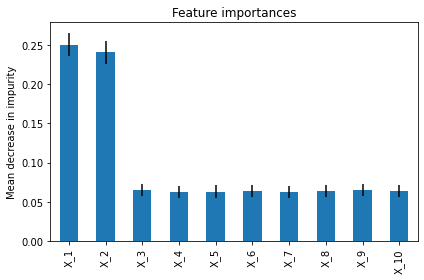

In [32]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Видим, что половину вклада вносят первые 2 признака, остальную половину вносят признаки X_3, X_4, ... , X_10

**В итоге** делаю вывод, что есть зависимость treatment от объектов, так как имеется неравномерное распределение данных в Х_1 и Х_2, а также, вносимый вклад признаков Х_1 и Х_2 на двоих равен 50%. 

1. Проверить все требуемые гипотезы

Выдвинем гипотезу, что средние y в W=1 и W=0 равны.

$$H_0: m_1 = m_0$$

$$H_1: m_1 \neq m_0$$

Исследуем распределения на нормальность. Воспользуемся **критерием Шапиро-Уилка**. Выберем уровень значимости **$\alpha$ = 0.05**.

In [36]:
stats.shapiro(df2[df2['W'] == 0]['y_1'])

(0.9994422197341919, 0.16677731275558472)

In [37]:
stats.shapiro(df2[df2['W'] == 1]['y_1'])

(0.9994078874588013, 0.088233083486557)

Видим, что p_value в обоих случаях больше чем уровень значимости => нет повода отклонять гипотезу о нормальном распределении выборок


 m=1.88 and sigma=2.07



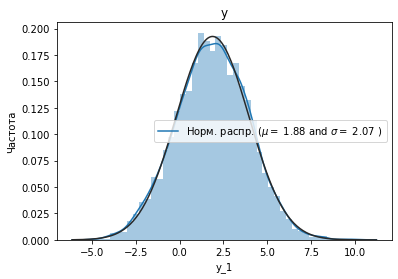

In [38]:
sns.distplot(df2[df2['W'] == 0]['y_1'], fit=stats.norm);

(mu, sigma) = stats.norm.fit(df2[df2['W'] == 0]['y_1'])
print( '\n m={:.2f} and sigma={:.2f}\n'.format(mu, sigma))

plt.legend(['Норм. распр. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Частота')
plt.title('y');


 m=2.31 and sigma=2.06



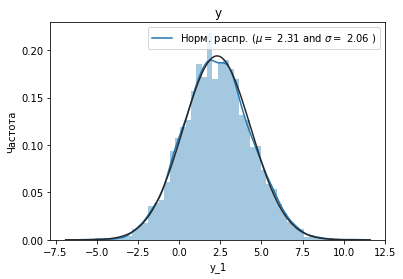

In [39]:
sns.distplot(df2[df2['W'] == 1]['y_1'], fit=stats.norm);

(mu, sigma) = stats.norm.fit(df2[df2['W'] == 1]['y_1'])
print( '\n m={:.2f} and sigma={:.2f}\n'.format(mu, sigma))

plt.legend(['Норм. распр. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Частота')
plt.title('y');

Чтобы проверить равенство мат. ожиданий при неизвестных дисперсиях нужно проверить гипотезу о равенстве дисперсий

Выдвинем гипотезу, что дисперсии y в W=1 и W=0 равны.

$$H_0: \sigma_1 = \sigma_0$$

$$H_1: \sigma_1 \neq \sigma_0$$

Исследуем распределения на равенство дисперсий. Воспользуемся **Критерием Бартлетта**. Выберем уровень значимости **$\alpha$ = 0.05**.

In [40]:
stats.bartlett(df2[df2['W'] == 1]['y_1'], df2[df2['W'] == 0]['y_1'])

BartlettResult(statistic=0.2500570194064032, pvalue=0.6170349312013674)

Видим, что p_value больше чем уровень значимости => нет повода отклонять гипотезу о равенстве дисперсий выборок

In [41]:
stats.ttest_ind(df2[df2['W'] == 1]['y_1'], df2[df2['W'] == 0]['y_1'], equal_var=True)

Ttest_indResult(statistic=10.434076818229196, pvalue=2.338313138968315e-25)

Видим, что p_value меньше чем уровень значимости => отклоняем гипотезу о равенстве мат. ожиданий выборок

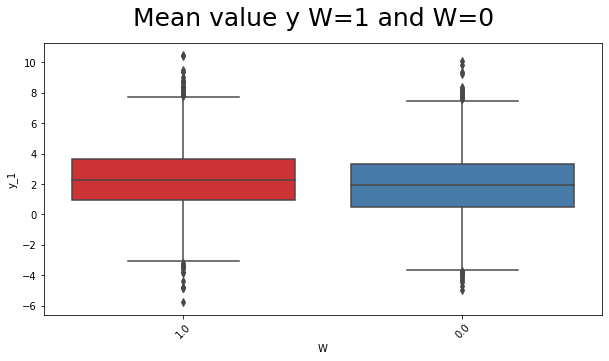

In [45]:
#создаем пространство для графика
fig = plt.figure(figsize=(10,5))
 
table = df2.groupby(['W'], as_index=False)['y_1'].mean().sort_values(by='y_1', ascending=False)

#построение графиков
ax = sns.boxplot(data=df2, x="W", y="y_1", order=table['W'].to_list(), palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle("Mean value y W=1 and W=0",fontsize=25);

2. Оценить ATE подходящим для этого случая методом (примените несколько методов)

В силу того, что нам даны результаты до и после AB тестирования посчитаем ATE

$$ \tau_{S,ATE} = \frac {1}{N} \sum\limits_{i=1}^N {(Y_i(1) - Y_i(0))}  $$

In [48]:
defATE = np.mean(df2['y_1'] - df2['y_0'])
std = np.std(df2['y_1'] - df2['y_0'])
print('ATE = %.3f +/- %.3f' %(defATE, std))

ATE = 1.353 +/- 3.052


Попробуем посчитать **CUPED**

In [49]:
cov = np.cov(df2['y_1'], df2['y_0'])[0][1]
var = np.var(df2['y_0'])
theta = cov / var

In [50]:
ATE = df2['y_1'] - (df2['y_0'] - np.mean(df2['y_0'])) * theta
print('ATE = %.3f +/- %.3f' %(np.mean(ATE), np.std(ATE)))

ATE = 2.105 +/- 2.074


3. Сравнить и проанализировать результаты оценок

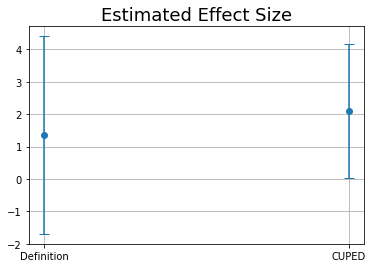

In [51]:
y = []
yerr = []
x_label = []

results = {'Definition': (defATE, std), 'CUPED': (np.mean(ATE), np.std(ATE))}

for method, result in results.items():
    y.append(result[0])
    yerr.append(result[1])
    x_label.append(method)
    
x = np.arange(len(y))

plt.errorbar(x=x, y=y, yerr=yerr, linestyle="none", capsize=5, marker="o")
plt.xticks(x, x_label)
plt.title("Estimated Effect Size", fontsize=18)
plt.grid();

4. Выводы

Были использованы методы CUPED и формула из определения ATE. Получены совпадающие результаты в пределах погрешности.

# 3. Построение uplift модели по результатам AB теста.

In [52]:
df3 = pd.read_csv(r'D:\Datasets\student_data\dataset_part3_students.csv', sep='\t')
df3.head()

,treatment,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,conversion
0,control,0.034351,0.550725,-1.348524,-0.029591,0.499535,-0.412464,0.933588,-0.522954,-0.029591,...,-0.314573,-0.879456,0.640264,1.165722,0.570495,0.529443,0.227962,1.929914,0.798664,0
1,control,-1.059404,0.299404,0.220273,-1.569660,1.084204,-2.167118,1.216469,-0.744547,-1.569660,...,0.303664,1.080643,2.646483,-0.329690,1.725636,1.434649,-2.064893,0.188000,-1.134651,0
2,control,0.051934,2.338729,-0.341017,-1.099362,0.693090,-2.424267,1.572066,-0.212798,-1.099362,...,-0.083721,-1.981712,0.224777,2.038004,2.516398,2.324280,-3.182196,-0.888490,-1.402561,0
3,treatment,0.667770,0.539316,0.468719,-0.840885,-0.708331,0.126634,1.275854,-0.954919,-0.840885,...,-0.752011,-0.347319,-1.659402,-0.871980,-0.893513,-0.658078,-2.704997,-0.390745,-1.578004,1
4,control,-1.416158,2.486628,0.496402,-1.174618,2.738267,-4.756755,-0.180918,-1.281432,-1.174618,...,-1.198151,-0.232961,0.948875,1.210523,1.536723,1.548610,-0.926435,0.972459,-0.711251,0


Посмотрим как распределены значения признака X_i, где i=1,22 в зависимости от treatment

In [53]:
def plot(ax, i):
    ax.hist(df3[df3['treatment'] == 'treatment']['X_'+str(i)], label='treatment');
    ax.hist(df3[df3['treatment'] == 'control']['X_'+str(i)], color='red', alpha=0.3, label='control')
    ax.set_title('Distribution of X_' + str(i) + ' depending treatment')
    ax.set_xlabel('X_' + str(i))
    ax.set_ylabel('frequancy')
    ax.legend()

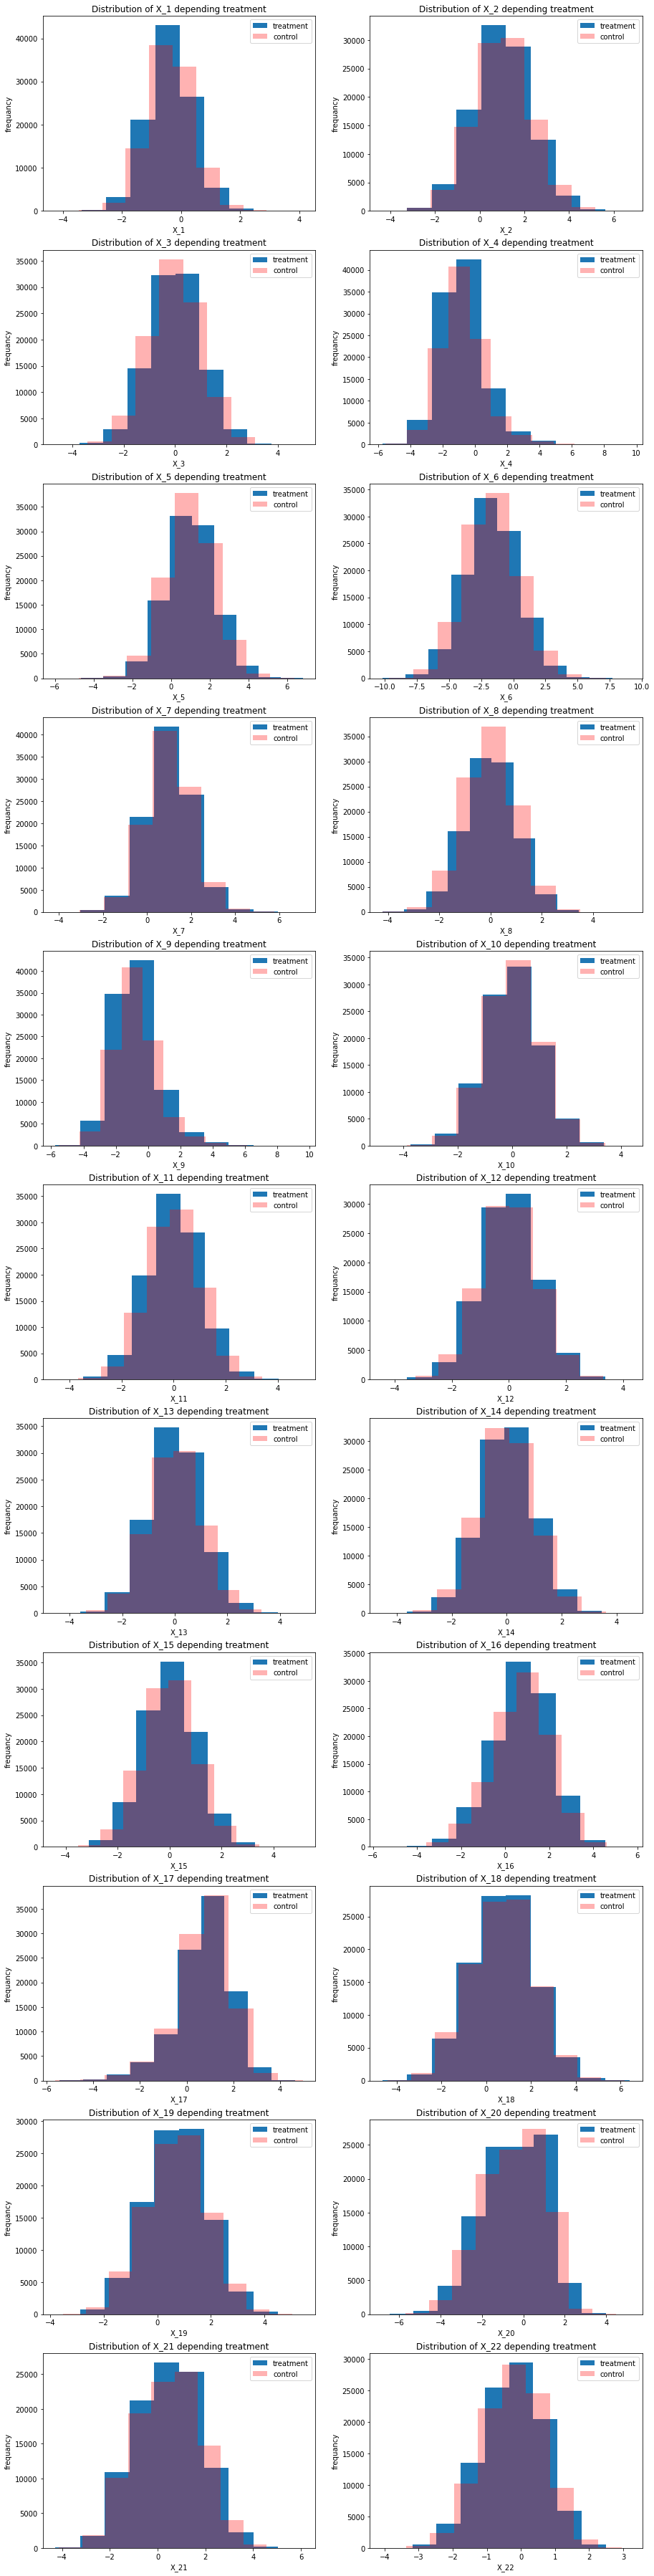

In [54]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), 
      (ax11, ax12), (ax13, ax14), (ax15, ax16), (ax17, ax18), (ax19, ax20),
      (ax21, ax22)) = plt.subplots(nrows=11, ncols=2, figsize=(15, 65))

list_ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14,
           ax15, ax16, ax17, ax18, ax19, ax20, ax21, ax22]
nums = [i for i in range(1, 23)]

for tup in zip(list_ax, nums):
    plot(tup[0], tup[1])
    
plt.show()

Видим, что признаки распределены примерно одинаково в control и treatment классах

1. Оцените ATE по данным.

Используем регрессию для оценки эффекта

$$ Y = \alpha + \beta Z + \gamma X$$ 

In [55]:
df = df3.copy()
df.replace('treatment', 1, inplace=True)
df.replace('control', 0, inplace=True)

X = df3[['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8',
       'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17',
       'X_18', 'X_19', 'X_20', 'X_21', 'X_22']]

In [56]:
from causalinference import CausalModel

cm = CausalModel(
    Y=df['conversion'].values, 
    D=df['treatment'].values, 
    X=X.values)

cm.est_via_ols(adj=1)

print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.060      0.001     45.225      0.000      0.058      0.063



2. Оцените CATE для каждого наблюдения.

In [63]:
#!pip install econml

In [95]:
# Main imports
from econml.metalearners import XLearner, DomainAdaptationLearner
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

In [1]:
Y = df['conversion'].copy()
T = df['treatment'].copy()

# Instantiate X learner
models = CatBoostRegressor()
propensity_model = CatBoostClassifier()
X_learner = XLearner(models=models, propensity_model=propensity_model)
# Train X_learner
X_learner.fit(Y=Y, T=T, X=X)
# Estimate treatment effects on data
X_te = X_learner.effect(X)

CATE

In [101]:
df['CATE'] = X_te
X_te

array([ 0.02548455, -0.01095116,  0.01405787, ...,  0.03578366,
       -0.03355556, -0.02348284])

3. Проставьте рекомендации к воздействию на каждый объект.

Ставим рекомендацию только тем, у кого CATE > 0 (возможно стоит увеличить этого порог исходя из затрат на воздействие) и treatment = 1, то есть на кого мы воздействовали. Это объясняется от обратного: у кого treatment = 0 и CATE > 0 это наши лояльные пользователи, которые и так купят. Те у кого treatment = 0 и CATE < 0 - потерянные. Те у кого treatment = 1 и CATE < 0 - mad dogs. То что осталось - наши искомые пользователи

In [108]:
df3['recommendation'] = np.where((df['CATE'] > 0) & (df['treatment'] == 1), 1, 0)

4. Какая ожидаемая конверсия при оптимальном воздействии?

Ожидаемая конверсия - то есть для той группы, которую мы выделили в прошлом пункте(люди, которых можно уговорить воздействием) мы считаем, что конверсия 1. Таким образом, добавляя к предыдущей конверсии новых пользователей получаем:

In [132]:
df_conversion = df3.copy()
df_conversion.loc[df_conversion['recommendation'] == 1, 'conversion'] = 1
conversion = sum(df_conversion['conversion']) / df_conversion.shape[0] * 100
print('Conversion %.2f' %conversion, '%', sep='')

Conversion 40.02%


Сравним с тем, что было до воздействия:

In [133]:
conversion = sum(df3['conversion']) / df3.shape[0] * 100
print('Conversion %.2f' %conversion, '%', sep='')

Conversion 15.29%


Таким образом, имеем увеличение конверсии в 2.6 раза

5. Все выводы, предпосылки и методы представляйте в явном виде в ноутбуке.

Так как соблюдаются условия рандомизированного эксперимента, то можем воспользоваться методом, использующий регрессию для оценки ATE. Получение значение равно 0.060 +/- 0.001. То есть имеем малый прирост. Затем было посчитано CATE и  поствлены рекомендации только тем, у кого CATE > 0 (возможно стоит увеличить этого порог исходя из затрат на воздействие) и treatment = 1, то есть на кого мы воздействовали. Получили прирост конверсии в 2.6 раз, подняв ее до 40.02% 